In [43]:
import os

In [44]:
wd_path = r'C:\Users\13473\Desktop\e4040-2020Fall-Project-WNZH-jr4001-xy2419-gl2664'
os.chdir(wd_path)
os.getcwd()

'C:\\Users\\13473\\Desktop\\e4040-2020Fall-Project-WNZH-jr4001-xy2419-gl2664'

In [45]:
file_name = 'complete_universe_cleaned_normalized_jonn.csv'

In [46]:
import pandas as pd
import numpy as np

from datetime import datetime

In [47]:
df = pd.read_csv(os.path.join(wd_path,file_name),dtype={'COMNAM':str,'NCUSIP':str,'PERMNO':str,'PERMCO':str,'SICCD':str,'TICKER_PERMNO':str},low_memory=False,index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [48]:
df.head(10)

,DATE,COMNAM,NCUSIP,PERMNO,PERMCO,SICCD,TICKER_PERMNO,accru,adv_sale,aftret_eq,...,m-9,m-8,m-7,m-6,m-5,m-4,m-3,m-2,m-1,m+1
27583,1971-01-31,A J INDUSTRIES INC,00147610,10014,22157,3714,AJ,-0.117260,-0.113519,-0.813571,...,0.001251,-0.941377,-1.176635,1.517398,-0.683777,-0.900893,0.593122,-0.940143,0.116698,0.0000
27584,1971-01-31,ACME CLEVELAND CORP NEW,00462610,10057,20020,3541,AMT,-0.064131,-0.113519,-0.196725,...,-0.056237,-0.915174,-0.584738,-0.403639,-0.806319,0.013049,-0.202798,-0.281856,0.339423,-6.6667
27585,1971-01-31,AIRCO INC,00929210,10102,22164,2813,AN,0.307774,-0.113519,-0.121193,...,1.278155,-1.462220,1.071018,0.013667,-0.673061,0.392360,0.847147,0.915201,-1.149364,9.0173
27586,1971-01-31,ALLEGHENY ENERGY INC,01736110,10137,20045,4911,AYE,0.445910,-0.113519,0.243880,...,0.247009,0.188850,0.451364,0.107172,-1.154944,0.238780,1.291454,-0.087532,-0.731256,-0.5291
27587,1971-01-31,HONEYWELL INTERNATIONAL INC,43851610,10145,22168,5099,HON,1.115338,-0.113519,-0.240785,...,0.720838,-0.591712,0.357377,1.069443,-1.573860,-0.095448,0.137207,1.965114,-0.814098,16.4467
27589,1971-01-31,AMAX INC,02312710,10161,20063,1011,AMX,0.275896,-0.113519,0.319412,...,1.346578,0.929403,-0.661364,-0.872553,-0.572310,-0.357254,-0.477762,0.423514,-1.058568,3.3208
27590,1971-01-31,AMBAC INDUSTRIES INC,02314110,10188,22170,3714,AB,0.116509,-0.113519,-0.102309,...,-0.744377,-0.608532,-0.445470,0.515734,0.429404,-1.486886,1.006496,1.019840,-0.115450,-8.1818
27591,1971-01-31,BEAM INC,07373010,10225,20067,3433,BEAM,0.509665,-0.113519,0.275352,...,1.098856,1.031713,0.099921,-0.160726,-1.156465,1.154392,1.245700,-0.735641,-0.785211,2.5405
27592,1971-01-31,AMERICAN BROADCASTING COS INC,02473510,10233,22176,4832,ABC,-0.181015,-0.113519,0.055049,...,0.615520,-0.540392,0.431352,0.328034,-0.130200,-1.017007,0.354591,-0.091862,-0.525110,7.0000
27593,1971-01-31,PRIMERICA CORP,74158710,10241,22177,3411,PA,0.350277,-0.113519,-0.039366,...,-0.025640,0.469740,0.648572,0.289932,-1.473809,0.284449,0.317817,-0.767282,-0.537445,0.0000


In [49]:
df['DATE'] = pd.to_datetime(df['DATE'],format='%Y-%m-%d')

In [50]:
sector_map = {'0':'Agriculture, Forestry and Fishing','10':'Mining','11':'Mining','12':'Mining','13':'Mining','14':'Mining','15':'Construction','16':'Construction','17':'Construction','18':'not used','19':'not used','20':'Manufacturing','21':'Manufacturing','22':'Manufacturing','23':'Manufacturing','24':'Manufacturing','25':'Manufacturing','26':'Manufacturing','27':'Manufacturing','28':'Manufacturing','29':'Manufacturing','30':'Manufacturing','31':'Manufacturing','32':'Manufacturing','33':'Manufacturing','34':'Manufacturing','35':'Manufacturing','36':'Manufacturing','37':'Manufacturing','38':'Manufacturing','39':'Manufacturing','40':'Transportation, Communications, Electric, Gas and Sanitary service','41':'Transportation, Communications, Electric, Gas and Sanitary service','42':'Transportation, Communications, Electric, Gas and Sanitary service','44':'Transportation, Communications, Electric, Gas and Sanitary service','45':'Transportation, Communications, Electric, Gas and Sanitary service','46':'Transportation, Communications, Electric, Gas and Sanitary service','47':'Transportation, Communications, Electric, Gas and Sanitary service','48':'Transportation, Communications, Electric, Gas and Sanitary service','49':'Transportation, Communications, Electric, Gas and Sanitary service','50':'Wholesale Trade','51':'Wholesale Trade','52':'Retail Trade','53':'Retail Trade','54':'Retail Trade','55':'Retail Trade','56':'Retail Trade','57':'Retail Trade','58':'Retail Trade','59':'Retail Trade','60':'Finance, Insurance','61':'Finance, Insurance','62':'Finance, Insurance','63':'Finance, Insurance','64':'Finance, Insurance','65':'Real Estate','66':'Finance, Insurance','67':'Finance, Insurance','70':'Services','71':'Services','72':'Services','73':'Services','74':'Services','75':'Services','76':'Services','78':'Services','79':'Services','80':'Services','81':'Services','82':'Services','83':'Services','86':'Services','87':'Services','89':'Services','91':'Public Administration','92':'Public Administration','94':'Public Administration','95':'Public Administration','96':'Public Administration','97':'Public Administration','99':'Nonclassifiable'}

In [51]:
temp = pd.get_dummies(df['SICCD'].str[:2].replace(sector_map))
df = pd.concat([df, temp], axis=1, sort=False)

In [52]:
temp.columns

Index(['Agriculture, Forestry and Fishing', 'Construction',
       'Finance, Insurance', 'Manufacturing', 'Mining', 'Nonclassifiable',
       'Public Administration', 'Real Estate', 'Retail Trade', 'Services',
       'Transportation, Communications, Electric, Gas and Sanitary service',
       'Wholesale Trade', 'not used'],
      dtype='object')

In [53]:
df['m+1_returns'] = df['m+1']
df.loc[:,'m+1'] = df.groupby(['DATE'])['m+1'].transform(lambda x: x.rank(pct = True))

In [54]:
df.head(10)

,DATE,COMNAM,NCUSIP,PERMNO,PERMCO,SICCD,TICKER_PERMNO,accru,adv_sale,aftret_eq,...,Mining,Nonclassifiable,Public Administration,Real Estate,Retail Trade,Services,"Transportation, Communications, Electric, Gas and Sanitary service",Wholesale Trade,not used,m+1_returns
27583,1971-01-31,A J INDUSTRIES INC,00147610,10014,22157,3714,AJ,-0.117260,-0.113519,-0.813571,...,0,0,0,0,0,0,0,0,0,0.0000
27584,1971-01-31,ACME CLEVELAND CORP NEW,00462610,10057,20020,3541,AMT,-0.064131,-0.113519,-0.196725,...,0,0,0,0,0,0,0,0,0,-6.6667
27585,1971-01-31,AIRCO INC,00929210,10102,22164,2813,AN,0.307774,-0.113519,-0.121193,...,0,0,0,0,0,0,0,0,0,9.0173
27586,1971-01-31,ALLEGHENY ENERGY INC,01736110,10137,20045,4911,AYE,0.445910,-0.113519,0.243880,...,0,0,0,0,0,0,1,0,0,-0.5291
27587,1971-01-31,HONEYWELL INTERNATIONAL INC,43851610,10145,22168,5099,HON,1.115338,-0.113519,-0.240785,...,0,0,0,0,0,0,0,1,0,16.4467
27589,1971-01-31,AMAX INC,02312710,10161,20063,1011,AMX,0.275896,-0.113519,0.319412,...,1,0,0,0,0,0,0,0,0,3.3208
27590,1971-01-31,AMBAC INDUSTRIES INC,02314110,10188,22170,3714,AB,0.116509,-0.113519,-0.102309,...,0,0,0,0,0,0,0,0,0,-8.1818
27591,1971-01-31,BEAM INC,07373010,10225,20067,3433,BEAM,0.509665,-0.113519,0.275352,...,0,0,0,0,0,0,0,0,0,2.5405
27592,1971-01-31,AMERICAN BROADCASTING COS INC,02473510,10233,22176,4832,ABC,-0.181015,-0.113519,0.055049,...,0,0,0,0,0,0,1,0,0,7.0000
27593,1971-01-31,PRIMERICA CORP,74158710,10241,22177,3411,PA,0.350277,-0.113519,-0.039366,...,0,0,0,0,0,0,0,0,0,0.0000


In [55]:
identifier_cols = ['DATE','COMNAM','NCUSIP','PERMNO','PERMCO','SICCD','TICKER_PERMNO']
cross_sectional_cols=['accru', 'adv_sale', 'aftret_eq', 'aftret_equity','aftret_invcapx', 'at_tu', 'bm', 'CAPEI', 'capital_rat', 'cash_debt',
       'cash_lt', 'cash_rat', 'cfm', 'curr_debt', 'curr_rat', 'de_rat','debt_assets', 'debt_at', 'debt_capit', 'debt_ebitd', 'debt_invcap',
       'divyield', 'dltt_be', 'equity_invcap', 'evm', 'gpm', 'GProf', 'intcov','intcov_rat', 'invt_act', 'lt_debt', 'lt_ppent', 'npm', 'ocf_lct',
       'opmad', 'opmbd', 'pay_tu', 'pcf', 'pe_ex', 'pe_inc', 'pretret_earnat','pretret', 'profit_lct', 'ps', 'ptb', 'ptpm', 'quick_rat', 'rd_sale',
       'rect_act', 'rect_tu', 'roa', 'roce', 'roe', 'sale_equity','sale_invcap', 'short_debt', 'staff_sale', 'totdebt_invcap']
sector_cols = ['Agriculture, Forestry and Fishing', 'Construction','Finance, Insurance', 'Manufacturing', 'Mining', 'Nonclassifiable',
       'Public Administration', 'Real Estate', 'Retail Trade', 'Services','Transportation, Communications, Electric, Gas and Sanitary service',
       'Wholesale Trade', 'not used']
time_series_cols= ['m-12','m-11', 'm-10', 'm-9', 'm-8', 'm-7', 'm-6', 'm-5', 'm-4', 'm-3', 'm-2','m-1']
all_cols = cross_sectional_cols + sector_cols + time_series_cols
Y = ['m+1']

In [56]:
from sklearn.ensemble import RandomForestRegressor

start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

X = df[all_cols]
y = df[Y]

x_train, y_train, x_test, y_test = X.loc[mask_train['DATE'],:], y.loc[mask_train['DATE']], X.loc[mask_test['DATE'],:], y.loc[mask_test['DATE']]

regr = RandomForestRegressor(n_estimators=20, max_depth=20,min_samples_split=100,min_samples_leaf=30, max_features=20, random_state=0)
regr.fit(x_train, y_train.values[:,0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [57]:
import sklearn as sk
import sklearn.metrics
import sklearn.utils 

0.004523076029481876

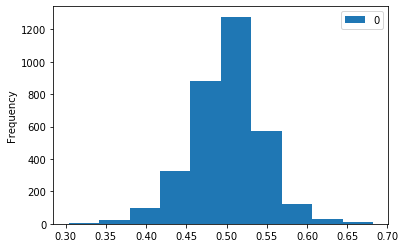

In [58]:
ynew=regr.predict(x_test)
pd.DataFrame(ynew).plot.hist()
sklearn.metrics.r2_score(y_test, ynew)

In [59]:
labs=5
c = sklearn.metrics.confusion_matrix(pd.qcut(y_test.values[:,0], labs, range(labs,0,-1)),pd.qcut(ynew, labs, range(labs,0,-1)))
c 

array([[126, 132, 137, 134, 138],
       [150, 148, 125, 145, 101],
       [177, 136, 117, 116, 118],
       [129, 133, 162, 126, 118],
       [ 86, 119, 127, 147, 194]], dtype=int64)

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Concatenate, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

In [61]:
'''Model 1:  MLP Classification'''
cross_sectional_inputs = Input(shape=(83,))

h1=Dense(128, activation='relu')(cross_sectional_inputs)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(5, activation='softmax')(h3)

mlp_model=tf.keras.Model(inputs=cross_sectional_inputs, outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
mlp_model.compile(
    optimizer=opt, loss='CategoricalCrossentropy',metrics=['accuracy']
)

In [62]:
start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = df[all_cols].values
y = pd.get_dummies(pd.qcut(df[Y].values[:,0], 5, range(0,5))).values 

x_train, y_train=sklearn.utils.shuffle(x[mask_train['DATE'],:], y[mask_train['DATE']],random_state=0)
x_test, y_test = x[mask_test['DATE'],:], y[mask_test['DATE']]

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/example1_class_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=5e-5, mode='min')

history_mlp=mlp_model.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

Epoch 1/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5751 - accuracy: 0.2656 - val_loss: 1.5724 - val_accuracy: 0.2667
Epoch 2/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5660 - accuracy: 0.2726 - val_loss: 1.5656 - val_accuracy: 0.2732
Epoch 3/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5615 - accuracy: 0.2750 - val_loss: 1.5612 - val_accuracy: 0.2754
Epoch 4/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5584 - accuracy: 0.2769 - val_loss: 1.5593 - val_accuracy: 0.2744
Epoch 5/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5556 - accuracy: 0.2798 - val_loss: 1.5613 - val_accuracy: 0.2748
Epoch 6/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5537 - accuracy: 0.2809 - val_loss: 1.5594 - val_accuracy: 0.2772
Epoch 7/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5518 - accuracy: 0.2819 - val_loss: 1.5582 - val_ac

-1.0335724313170904

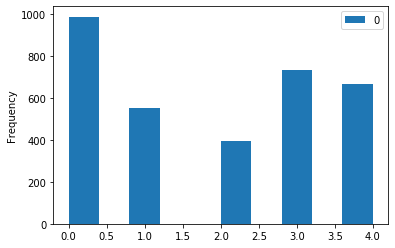

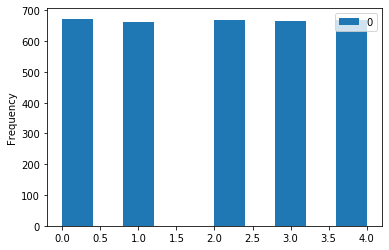

In [63]:
ynew=mlp_model.predict(x_test)
pd.DataFrame(ynew.argmax(axis=1)).plot.hist()
pd.DataFrame(y_test.argmax(axis=1)).plot.hist()
sk.metrics.r2_score(y_test.argmax(axis=1), ynew.argmax(axis=1))

In [64]:
c=sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), ynew.argmax(axis=1))
c

array([[335,  72,  31,  67, 168],
       [173, 108,  86, 156, 140],
       [171, 115,  76, 177, 129],
       [114, 143, 106, 196, 108],
       [195, 116,  98, 139, 122]], dtype=int64)

In [65]:
'''Model 1:  MLP Regression'''
cross_sectional_inputs = Input(shape=(83,))

h1=Dense(128, activation='relu')(cross_sectional_inputs)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(1, activation='sigmoid')(h3)

mlp_model=tf.keras.Model(inputs=cross_sectional_inputs, outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
mlp_model.compile(
    optimizer=opt, loss='binary_crossentropy',metrics=['binary_crossentropy','mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']
)

In [66]:
start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = df[all_cols].values
y = df[Y].values[:,0]

x_train, y_train=sklearn.utils.shuffle(x[mask_train['DATE'],:], y[mask_train['DATE']],random_state=0)
x_test, y_test=x[mask_test['DATE'],:], y[mask_test['DATE']]

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/example2_reg_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

history_mlp=mlp_model.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

Epoch 1/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6910 - binary_crossentropy: 0.6910 - mean_squared_error: 0.0822 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 344.8385 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904 - val_mean_squared_error: 0.0822 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 309.9805
Epoch 2/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6898 - binary_crossentropy: 0.6898 - mean_squared_error: 0.0816 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 342.4493 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915 - val_mean_squared_error: 0.0827 - val_mean_absolute_error: 0.2476 - val_mean_absolute_percentage_error: 325.2656
Epoch 3/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6892 - binary_crossentropy: 0.6892 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 339.9270 - val_loss: 0.6895

-0.033522221760808435

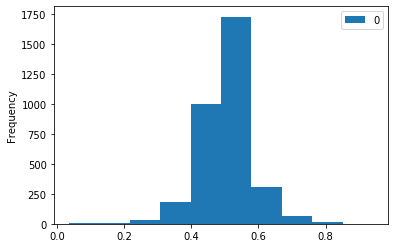

In [67]:
ynew=mlp_model.predict(x_test)
pd.DataFrame(ynew).plot.hist()
sk.metrics.r2_score(y_test, ynew)

In [68]:
labs=5
c = sklearn.metrics.confusion_matrix(pd.qcut(y_test, labs, range(0,labs)),pd.qcut(ynew[:,0], labs, range(0,labs)))
c

array([[183, 129, 128, 128, 105],
       [134, 139, 124, 129, 142],
       [129, 139, 126, 114, 156],
       [ 98, 129, 136, 157, 149],
       [125, 132, 154, 140, 116]], dtype=int64)

In [134]:
'''Model 2: LSTM + MLP'''
time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(1, activation='sigmoid')(h3)

hybrid_model=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
hybrid_model.compile(
    optimizer=opt, loss='binary_crossentropy',metrics=['binary_crossentropy','mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']
)

In [135]:
start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = [df[all_cols].values,df[time_series_cols].values]
y = df[Y].values[:,0]

x_train, x_test, y_train, y_test=[i[mask_train['DATE'],:] for i in x], [i[mask_test['DATE'],:] for i in x], y[mask_train['DATE']], y[mask_test['DATE']]

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/example3_hybrid_reg_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

history_hybrid=hybrid_model.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

Epoch 1/100
1213/1213 [==============================] - 10s 8ms/step - loss: 0.6905 - binary_crossentropy: 0.6905 - mean_squared_error: 0.0820 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 339.7402 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_mean_squared_error: 0.0827 - val_mean_absolute_error: 0.2487 - val_mean_absolute_percentage_error: 353.7748
Epoch 2/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6894 - binary_crossentropy: 0.6894 - mean_squared_error: 0.0814 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 338.3126 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912 - val_mean_squared_error: 0.0823 - val_mean_absolute_error: 0.2474 - val_mean_absolute_percentage_error: 338.3136
Epoch 3/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6885 - binary_crossentropy: 0.6885 - mean_squared_error: 0.0810 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 336.0453 - val_loss: 0.692

-0.021345654142637782

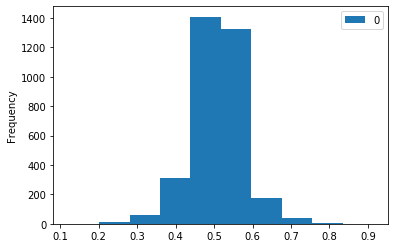

In [136]:
ynew=hybrid_model.predict(x_test)
pd.DataFrame(ynew).plot.hist()
sk.metrics.r2_score(y_test, ynew)

In [137]:
dates = pd.date_range('1971-01-31','2019-12-31')

In [138]:
dates = df['DATE'].unique()

In [ ]:
import dateutil.relativedelta 

x = [df[all_cols].values,df[time_series_cols].values]
y = df[Y].values[:,0]

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

for dt in dates[119:]:
    end_date = pd.to_datetime(dt)
    start_date = pd.to_datetime(pd.to_datetime(dt) - relativedelta(years=10))
    
    print(start_date,end_date)
    
    mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<=end_date)
    
    x_train, x_test, y_train, y_test=[i[mask_train['DATE'],:] for i in x], [i[mask_test['DATE'],:] for i in x], y[mask_train['DATE']], y[mask_test['DATE']]
    
    mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/hybrid_reg_model_train_period_'+str(start_date.month)+'_'+str(start_date.year)+'_'+str(end_date.month)+'_'+str(end_date.year)+'.hdf5'), save_best_only=True, monitor='val_loss', mode='min')    
    
    history_hybrid=hybrid_model.fit(
        x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
        callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
        validation_split=0.1
    )

1970-12-31 00:00:00 1980-12-31 00:00:00
Epoch 1/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6820 - binary_crossentropy: 0.6820 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 322.8554 - val_loss: 0.6966 - val_binary_crossentropy: 0.6966 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2499 - val_mean_absolute_percentage_error: 339.5627
Epoch 2/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6819 - binary_crossentropy: 0.6819 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 322.0284 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0849 - val_mean_absolute_error: 0.2499 - val_mean_absolute_percentage_error: 339.8515
Epoch 3/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6818 - binary_crossentropy: 0.6818 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2384 - mean_absolute_perce

Epoch 9/100
1225/1225 [==============================] - 9s 7ms/step - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 321.1754 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_mean_squared_error: 0.0854 - val_mean_absolute_error: 0.2509 - val_mean_absolute_percentage_error: 342.9128
Epoch 10/100
1225/1225 [==============================] - 9s 7ms/step - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 321.1748 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_mean_squared_error: 0.0854 - val_mean_absolute_error: 0.2509 - val_mean_absolute_percentage_error: 342.9121
Epoch 11/100
1221/1225 [============================>.] - ETA: 0s - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 320.6789
Epoch 00011: ReduceL

Epoch 5/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6818 - binary_crossentropy: 0.6818 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 322.0459 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 339.5667
Epoch 6/100
1233/1236 [============================>.] - ETA: 0s - loss: 0.6818 - binary_crossentropy: 0.6818 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 322.0540
Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.99999937286777e-12.
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6818 - binary_crossentropy: 0.6818 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 322.0459 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2517 - 

1248/1248 [==============================] - 9s 8ms/step - loss: 0.6823 - binary_crossentropy: 0.6823 - mean_squared_error: 0.0780 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 322.1807 - val_loss: 0.6977 - val_binary_crossentropy: 0.6977 - val_mean_squared_error: 0.0855 - val_mean_absolute_error: 0.2512 - val_mean_absolute_percentage_error: 348.2205
Epoch 2/100
1248/1248 [==============================] - 9s 7ms/step - loss: 0.6823 - binary_crossentropy: 0.6823 - mean_squared_error: 0.0780 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 322.1808 - val_loss: 0.6977 - val_binary_crossentropy: 0.6977 - val_mean_squared_error: 0.0855 - val_mean_absolute_error: 0.2512 - val_mean_absolute_percentage_error: 348.2205
Epoch 3/100
1248/1248 [==============================] - 9s 7ms/step - loss: 0.6823 - binary_crossentropy: 0.6823 - mean_squared_error: 0.0780 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 322.1811 - val_loss: 0.6977 - val_binar

1254/1254 [==============================] - 10s 8ms/step - loss: 0.6825 - binary_crossentropy: 0.6825 - mean_squared_error: 0.0781 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 322.2391 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 350.1274
Epoch 10/100
1254/1254 [==============================] - 10s 8ms/step - loss: 0.6825 - binary_crossentropy: 0.6825 - mean_squared_error: 0.0781 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 322.2392 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 350.1274
Epoch 11/100
1251/1254 [============================>.] - ETA: 0s - loss: 0.6825 - binary_crossentropy: 0.6825 - mean_squared_error: 0.0781 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 322.4749
Epoch 00011: ReduceLROnPlateau

Epoch 6/100
1265/1266 [============================>.] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.6829 - mean_squared_error: 0.0782 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 323.3158
Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.999999841327613e-22.
1266/1266 [==============================] - 9s 7ms/step - loss: 0.6829 - binary_crossentropy: 0.6829 - mean_squared_error: 0.0782 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 323.3140 - val_loss: 0.6960 - val_binary_crossentropy: 0.6960 - val_mean_squared_error: 0.0847 - val_mean_absolute_error: 0.2498 - val_mean_absolute_percentage_error: 347.4040
Epoch 7/100
1266/1266 [==============================] - 9s 7ms/step - loss: 0.6829 - binary_crossentropy: 0.6829 - mean_squared_error: 0.0782 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 323.3142 - val_loss: 0.6960 - val_binary_crossentropy: 0.6960 - val_mean_squared_error: 0.0847 - val_mean_absolute_error: 0.2498 -

1277/1277 [==============================] - 9s 7ms/step - loss: 0.6831 - binary_crossentropy: 0.6831 - mean_squared_error: 0.0784 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 323.7462 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2496 - val_mean_absolute_percentage_error: 346.7239
Epoch 3/100
1277/1277 [==============================] - 9s 7ms/step - loss: 0.6831 - binary_crossentropy: 0.6831 - mean_squared_error: 0.0784 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 323.7465 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2496 - val_mean_absolute_percentage_error: 346.7239
Epoch 4/100
1277/1277 [==============================] - 9s 7ms/step - loss: 0.6831 - binary_crossentropy: 0.6831 - mean_squared_error: 0.0784 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 323.7456 - val_loss: 0.6957 - val_binar

1283/1283 [==============================] - 9s 7ms/step - loss: 0.6833 - binary_crossentropy: 0.6833 - mean_squared_error: 0.0785 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 324.5202 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2489 - val_mean_absolute_percentage_error: 341.4435
Epoch 11/100
1281/1283 [============================>.] - ETA: 0s - loss: 0.6833 - binary_crossentropy: 0.6833 - mean_squared_error: 0.0784 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 324.6426
Epoch 00011: ReduceLROnPlateau reducing learning rate to 5.000000136226006e-29.
1283/1283 [==============================] - 9s 7ms/step - loss: 0.6833 - binary_crossentropy: 0.6833 - mean_squared_error: 0.0785 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 324.5204 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2489 - val_mean_a

Epoch 7/100
1296/1296 [==============================] - 9s 7ms/step - loss: 0.6835 - binary_crossentropy: 0.6835 - mean_squared_error: 0.0786 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 325.2081 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 342.0551
Epoch 8/100
1296/1296 [==============================] - 9s 7ms/step - loss: 0.6835 - binary_crossentropy: 0.6835 - mean_squared_error: 0.0786 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 325.2079 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 342.0551
Epoch 9/100
1296/1296 [==============================] - 9s 7ms/step - loss: 0.6835 - binary_crossentropy: 0.6835 - mean_squared_error: 0.0786 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 325.2083 - val_loss: 0.6942

In [ ]:
'''Model 2: LSTM + MLP'''
time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(5, activation='softmax')(h3)

hybrid_model=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
hybrid_model.compile(
    optimizer=opt, loss='CategoricalCrossentropy',metrics=['accuracy']
)

In [ ]:
x = [df[all_cols].values,df[time_series_cols].values]
y = pd.get_dummies(pd.qcut(df[Y].values[:,0], 5, range(0,5))).values 

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

for dt in dates[119:]:
    end_date = pd.to_datetime(dt)
    start_date = pd.to_datetime(pd.to_datetime(dt) - relativedelta(years=10))
    
    print(start_date,end_date)
    
    mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<=end_date)
    
    x_train, x_test, y_train, y_test=[i[mask_train['DATE'],:] for i in x], [i[mask_test['DATE'],:] for i in x], y[mask_train['DATE']], y[mask_test['DATE']]
    
    mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/hybrid_class_model_train_period_'+str(start_date.month)+'_'+str(start_date.year)+'_'+str(end_date.month)+'_'+str(end_date.year)+'.hdf5'), save_best_only=True, monitor='val_loss', mode='min')    
    
    history_hybrid=hybrid_model.fit(
        x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
        callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
        validation_split=0.1
    )